<a href="https://colab.research.google.com/github/charlie-paterson/Student-Exam-App-Machine-Learning/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Data Preprocessing

### Importing the Database

In [2]:
raw_data = pd.read_csv('ml_datasource.csv')
raw_data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


### Removing Outliers

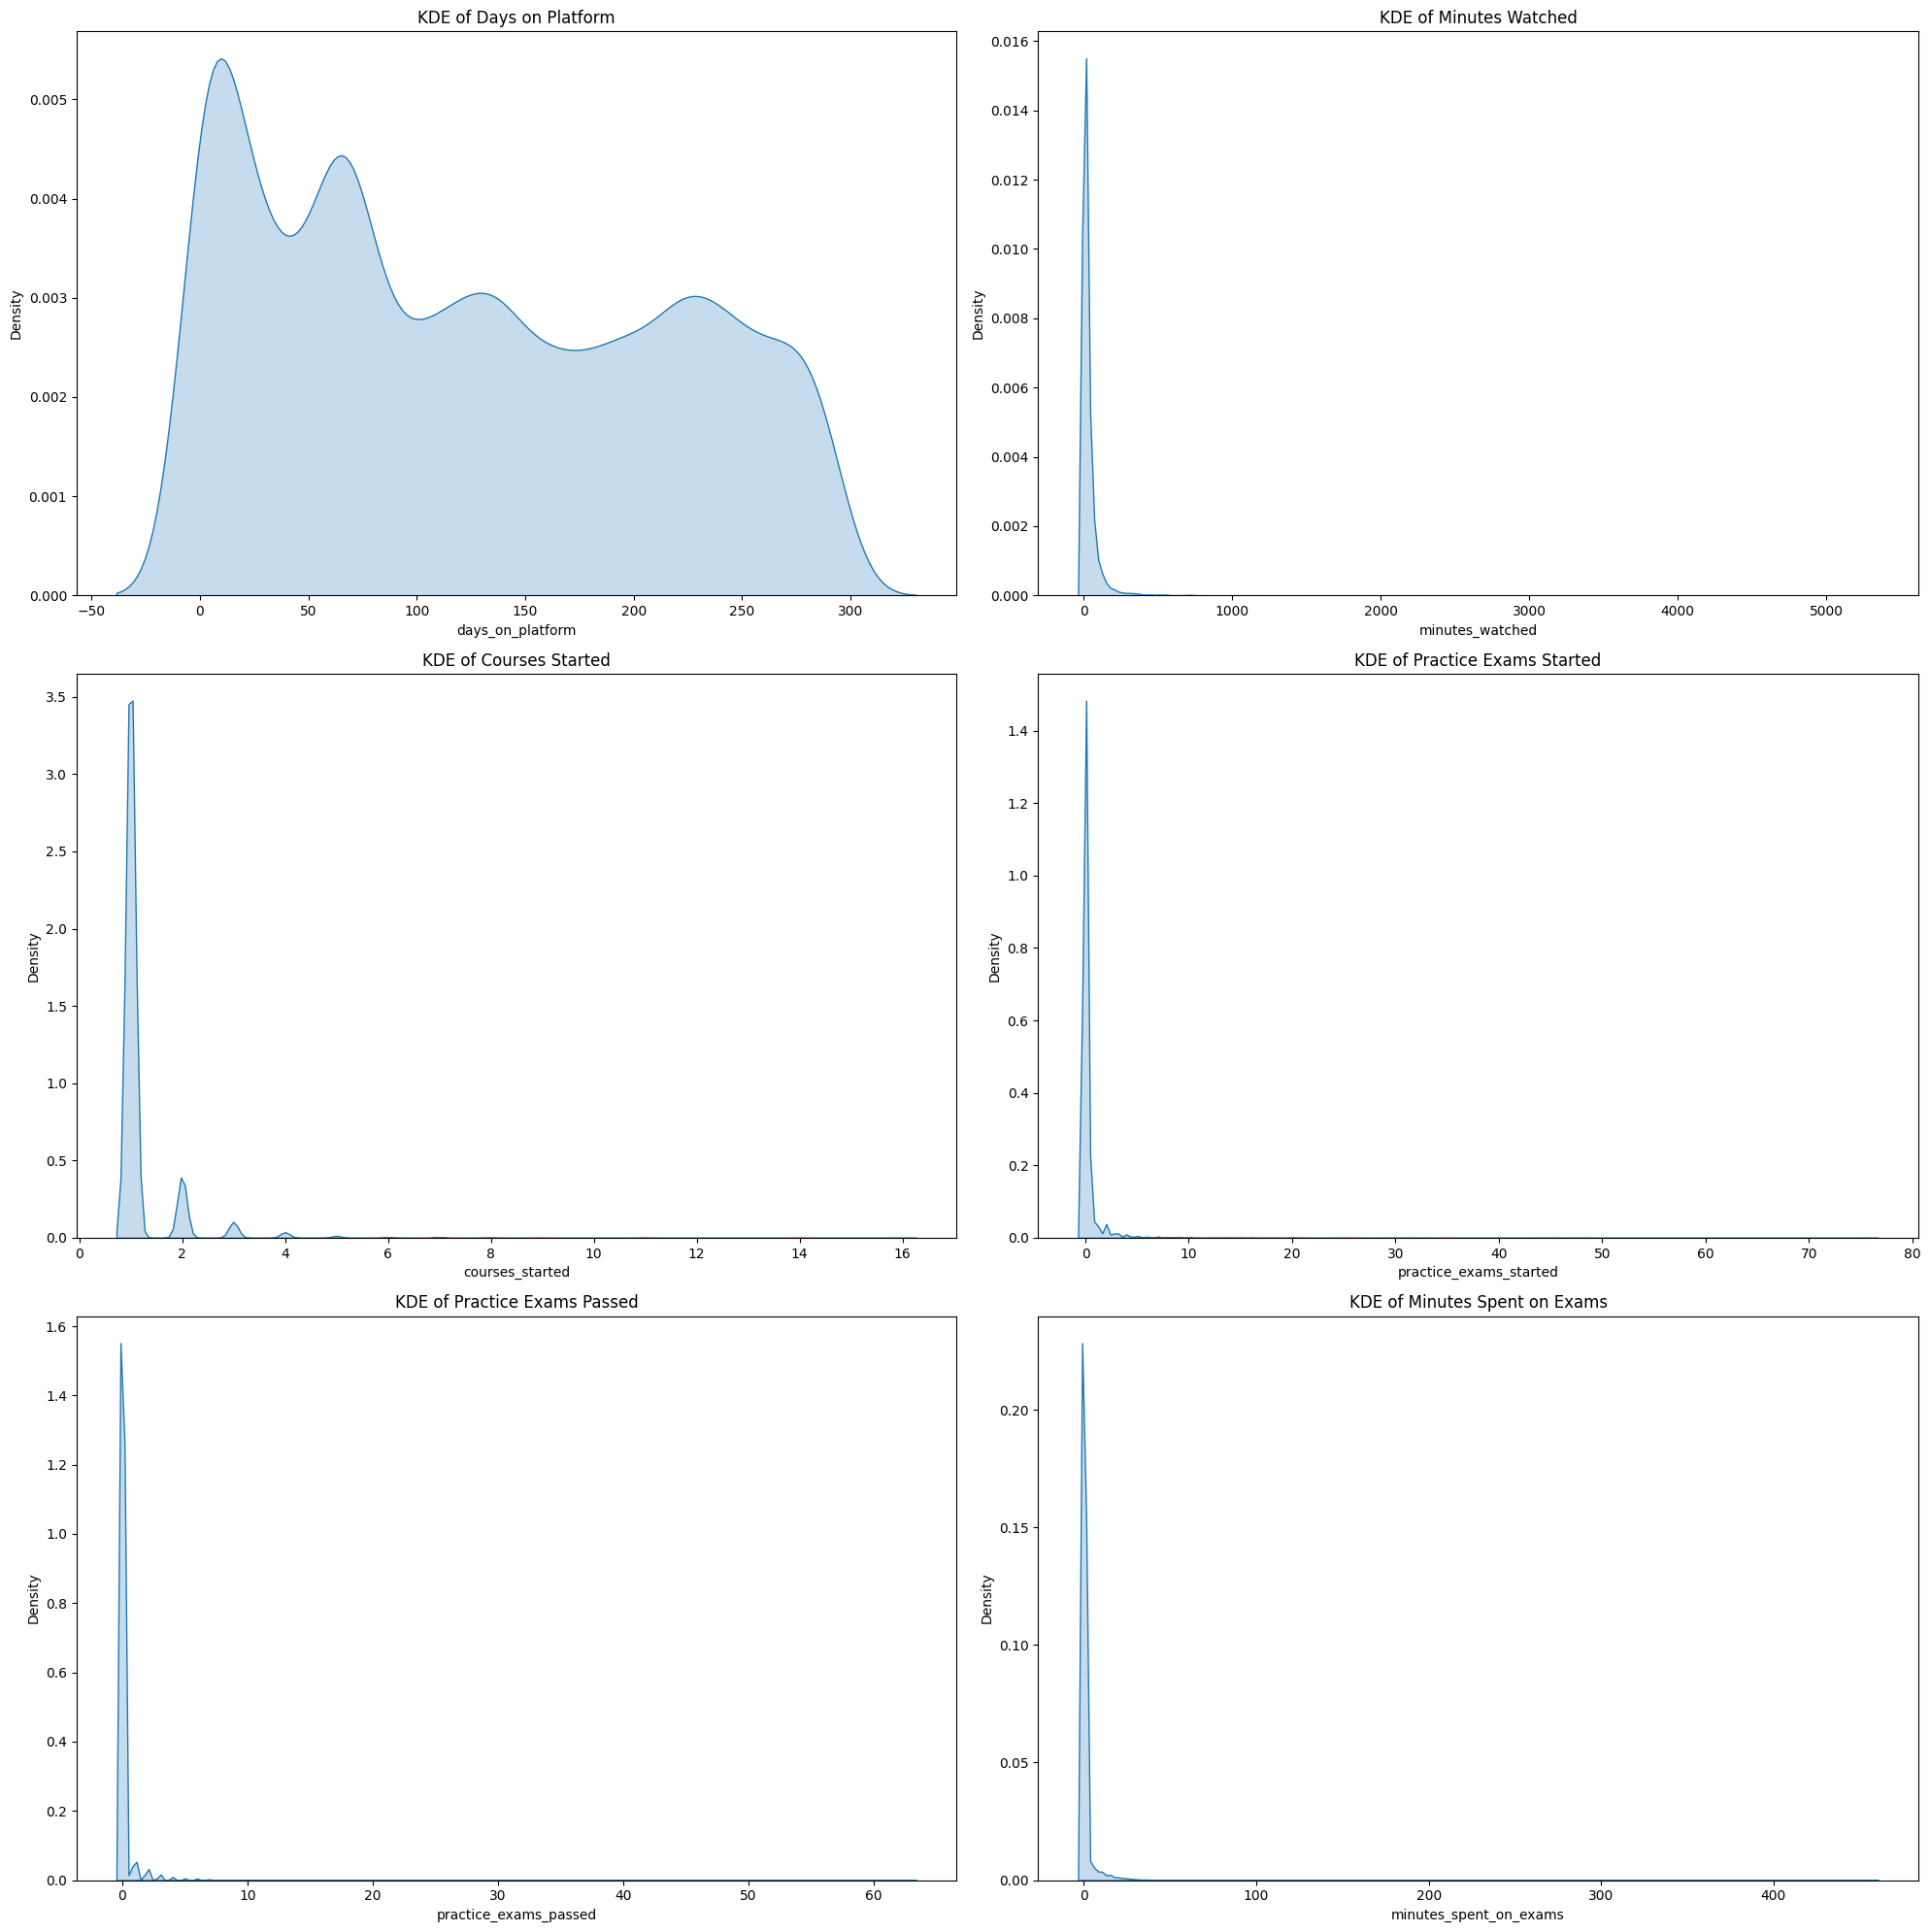

In [3]:
fig, axes = plt.subplots(3, 2, figsize=(20,20))
sns.kdeplot(data=raw_data, x='days_on_platform', fill=True, ax=axes[0, 0])
axes[0, 0].set_title('KDE of Days on Platform')
sns.kdeplot(data=raw_data, x='minutes_watched', fill=True, ax=axes[0, 1])
axes[0, 1].set_title('KDE of Minutes Watched')
sns.kdeplot(data=raw_data, x='courses_started', fill=True, ax=axes[1, 0])
axes[1, 0].set_title('KDE of Courses Started')
sns.kdeplot(data=raw_data, x='practice_exams_started', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('KDE of Practice Exams Started')
sns.kdeplot(data=raw_data, x='practice_exams_passed', fill=True, ax=axes[2, 0])
axes[2, 0].set_title('KDE of Practice Exams Passed')
sns.kdeplot(data=raw_data, x='minutes_spent_on_exams', fill=True, ax=axes[2, 1])
axes[2, 1].set_title('KDE of Minutes Spent on Exams')
plt.tight_layout()
plt.show()

In [4]:
raw_datar1 = raw_data[raw_data['minutes_watched'] <= 1000]
#raw_datar1.sort_values(by='minutes_watched', ascending=False)
raw_datar2 = raw_datar1[raw_datar1['courses_started'] <= 10]
#raw_datar2.sort_values(by='courses_started', ascending=False)
data3 = raw_datar2[raw_datar2['practice_exams_started'] <= 10]
#data3.sort_values(by='practice_exams_started', ascending=False)
data_no_outliers = data3[data3['minutes_spent_on_exams'] <= 40]
data_no_outliers

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0
...,...,...,...,...,...,...,...,...
17756,EG,0,0.8,1,0,0,0.00,0
17757,IN,0,0.1,1,0,0,0.00,0
17758,CM,0,7.8,1,0,0,0.00,0
17759,CA,0,10.4,1,0,0,0.00,0


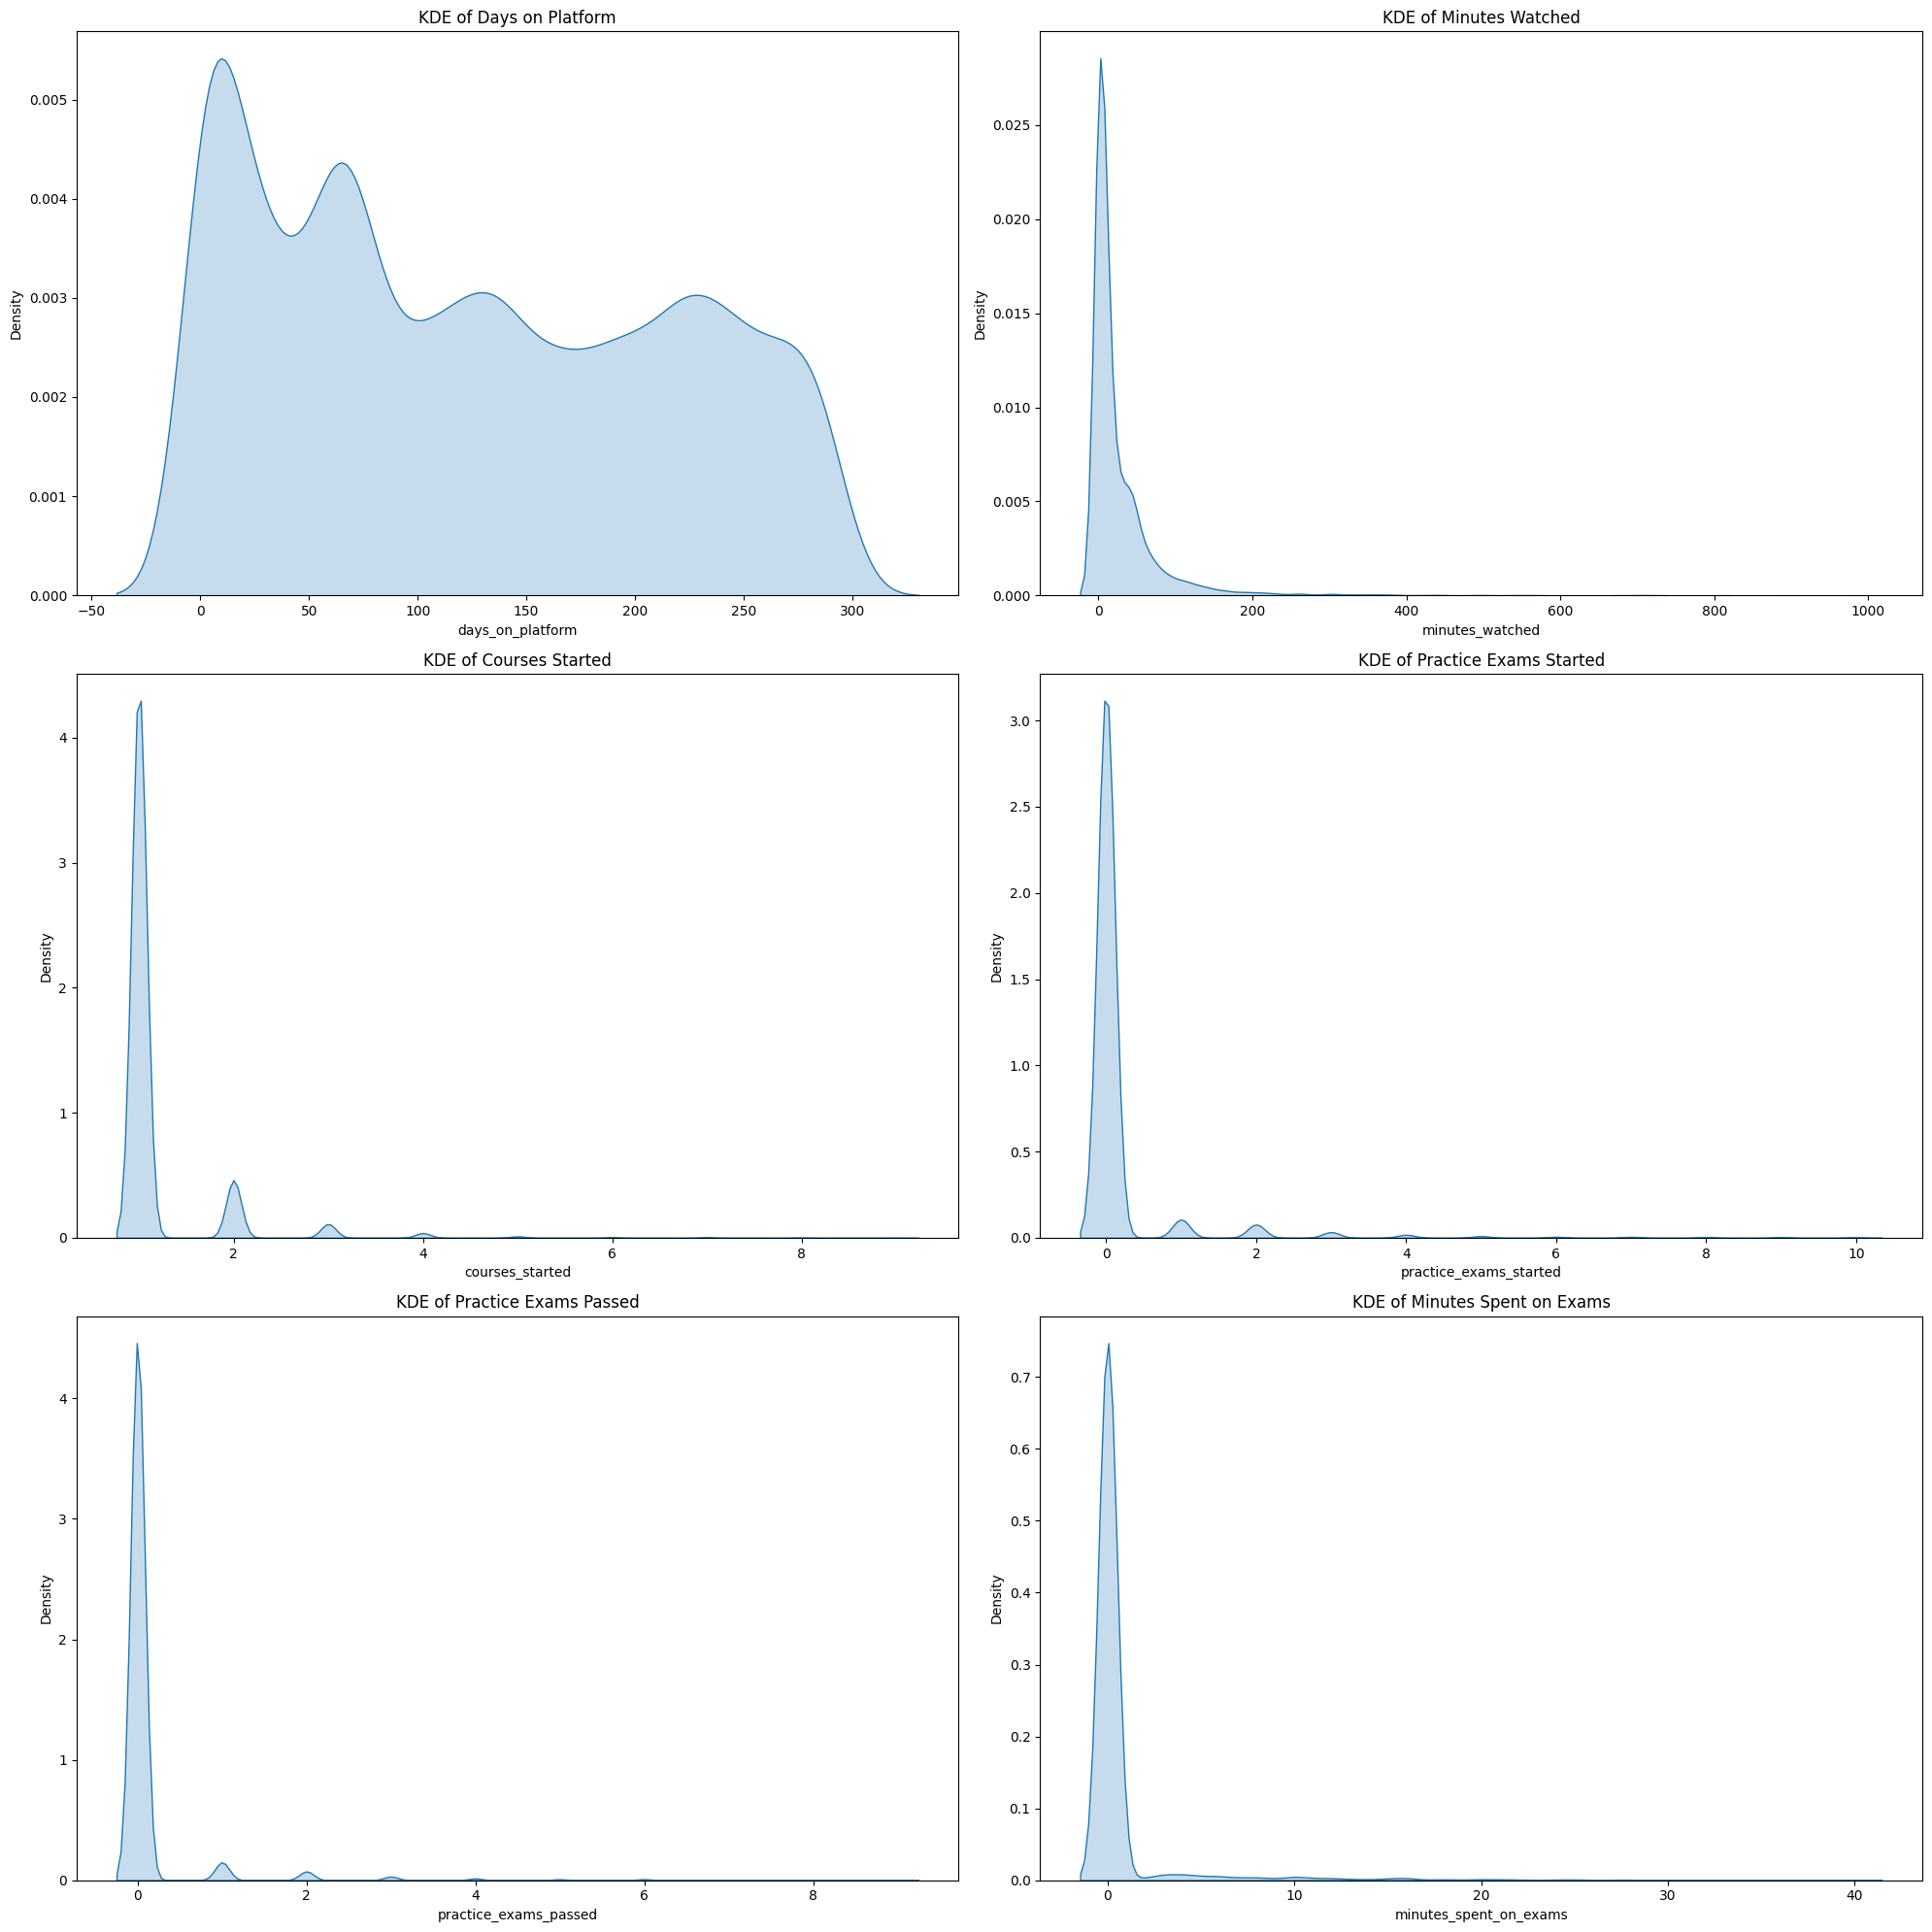

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
sns.kdeplot(data=data_no_outliers, x='days_on_platform', fill=True, ax=axes[0, 0])
axes[0, 0].set_title('KDE of Days on Platform')
sns.kdeplot(data=data_no_outliers, x='minutes_watched', fill=True, ax=axes[0, 1])
axes[0, 1].set_title('KDE of Minutes Watched')
sns.kdeplot(data=data_no_outliers, x='courses_started', fill=True, ax=axes[1, 0])
axes[1, 0].set_title('KDE of Courses Started')
sns.kdeplot(data=data_no_outliers, x='practice_exams_started', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('KDE of Practice Exams Started')
sns.kdeplot(data=data_no_outliers, x='practice_exams_passed', fill=True, ax=axes[2, 0])
axes[2, 0].set_title('KDE of Practice Exams Passed')
sns.kdeplot(data=data_no_outliers, x='minutes_spent_on_exams', fill=True, ax=axes[2, 1])
axes[2, 1].set_title('KDE of Minutes Spent on Exams')
plt.tight_layout()
plt.show()

### Checking for Multicollinearity

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_no_outliers.loc[:, 'intercept'] = 1
features = data_no_outliers[['days_on_platform', 'minutes_watched',
                             'courses_started', 'practice_exams_started',
                             'practice_exams_passed', 'minutes_spent_on_exams', 'intercept']]

vif_data = pd.DataFrame()
vif_data['feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif_data = vif_data[vif_data['feature'] != 'intercept']
print(vif_data)

                  feature       VIF
0        days_on_platform  1.026055
1         minutes_watched  1.526461
2         courses_started  1.363355
3  practice_exams_started  9.731895
4   practice_exams_passed  7.505868
5  minutes_spent_on_exams  3.190319


<ipython-input-6-d298b0ac13e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers.loc[:, 'intercept'] = 1


In [7]:
data_drop = data_no_outliers.drop('practice_exams_started', axis=1, errors='ignore')
data_no_mult = data_drop.drop('practice_exams_passed', axis=1, errors='ignore')
data_no_mult

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased,intercept
0,US,288,358.1,1,15.81,0,1
1,SG,260,1.7,1,16.00,0,1
2,TR,260,22.4,1,0.93,0,1
3,KE,259,18.8,1,14.63,0,1
4,IN,259,118.0,2,16.48,0,1
...,...,...,...,...,...,...,...
17756,EG,0,0.8,1,0.00,0,1
17757,IN,0,0.1,1,0.00,0,1
17758,CM,0,7.8,1,0.00,0,1
17759,CA,0,10.4,1,0.00,0,1


In [8]:
features = data_no_mult[['days_on_platform', 'minutes_watched',
                             'courses_started', 'minutes_spent_on_exams', 'intercept']]

vif_data = pd.DataFrame()
vif_data['feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif_data = vif_data[vif_data['feature'] != 'intercept']
print(vif_data)

                  feature       VIF
0        days_on_platform  1.022349
1         minutes_watched  1.489463
2         courses_started  1.357284
3  minutes_spent_on_exams  1.169177


### Dealing with NaN Values

In [9]:
data_no_mult.loc[data_no_mult['student_country'].isna()]

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased,intercept
311,NaN,88,58.1,1,11.20,1,1
337,NaN,86,43.0,1,12.96,0,1
556,NaN,121,241.9,2,21.29,0,1
806,NaN,64,86.4,1,4.98,0,1
1097,NaN,72,67.5,1,6.27,0,1
12363,NaN,84,6.2,1,0.00,0,1
12633,NaN,78,3.0,1,0.00,0,1
16946,NaN,11,8.2,1,0.00,0,1


In [10]:
data_no_mult['student_country'] = data_no_mult['student_country'].fillna('NAM')
data_no_mult.loc[data_no_mult['student_country'].isna()]
data_no_nulls = data_no_mult
data_no_nulls

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased,intercept
0,US,288,358.1,1,15.81,0,1
1,SG,260,1.7,1,16.00,0,1
2,TR,260,22.4,1,0.93,0,1
3,KE,259,18.8,1,14.63,0,1
4,IN,259,118.0,2,16.48,0,1
...,...,...,...,...,...,...,...
17756,EG,0,0.8,1,0.00,0,1
17757,IN,0,0.1,1,0.00,0,1
17758,CM,0,7.8,1,0.00,0,1
17759,CA,0,10.4,1,0.00,0,1


### Splitting the Data

In [11]:
X = data_no_nulls.drop(columns='purchased')
y = data_no_nulls['purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state = 365,stratify=y)

### Encoding the Data

In [12]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=170)
X_train['student_country_enc'] = enc.fit_transform(X_train['student_country'].to_numpy().reshape(-1, 1))
X_test['student_country_enc'] = enc.transform(X_test['student_country'].to_numpy().reshape(-1, 1))
X_train = X_train.drop(columns='student_country', errors='ignore')
X_test = X_test.drop(columns='student_country', errors='ignore')

In [13]:
X_train_array = np.asarray(X_train, dtype='float')
y_train_array = np.asarray(y_train, dtype='int')
X_test_array = np.asarray(X_test, dtype='float')
y_test_array = np.asarray(y_test, dtype='int')
print("X_train_array:")
print(X_train_array)
print("\ny_train_array:")
print(y_train_array)
print("\nX_test_array:")
print(X_test_array)
print("\ny_test_array:")
print(y_test_array)

X_train_array:
[[155.    21.8    1.     0.     1.    94.  ]
 [ 32.    27.1    1.     0.     1.   124.  ]
 [134.    32.7    1.     0.     1.   150.  ]
 ...
 [ 42.    44.     1.     0.     1.   157.  ]
 [118.    79.3    2.     2.17   1.    14.  ]
 [223.     0.3    1.     0.     1.    58.  ]]

y_train_array:
[0 0 0 ... 0 0 0]

X_test_array:
[[248.    0.3   1.    0.    1.   67. ]
 [242.   58.1   1.    0.    1.   44. ]
 [  7.   41.3   1.   25.    1.   20. ]
 ...
 [ 78.    3.8   1.    0.    1.  170. ]
 [135.    4.5   1.    0.    1.   89. ]
 [277.   12.1   1.    0.    1.   26. ]]

y_test_array:
[0 0 0 ... 0 0 0]


# Creating a Logistic Regression Model

In [14]:
log_reg = sm.Logit(y_train_array, X_train_array)
log_reg_results = log_reg.fit()
print(log_reg_results.summary())

Optimization terminated successfully.
         Current function value: 0.151279
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                13219
Model:                          Logit   Df Residuals:                    13213
Method:                           MLE   Df Model:                            5
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:                  0.5080
Time:                        09:16:43   Log-Likelihood:                -1999.8
converged:                       True   LL-Null:                       -4064.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0662      0.002    -29.632      0.000      -0.071      -0.062
x2             0.0127      0

In [15]:
predicted_probabilities = log_reg_results.predict(X_test_array)
predicted_classes = np.round(predicted_probabilities).astype(int)
print("Predicted Probabilities:")
print(predicted_probabilities)

print("\nPredicted Classes:")
print(predicted_classes)

Predicted Probabilities:
[5.03874806e-08 1.32049001e-07 1.18820024e-01 ... 8.57690422e-03
 1.10885708e-04 6.35964705e-09]

Predicted Classes:
[0 0 0 ... 0 0 0]


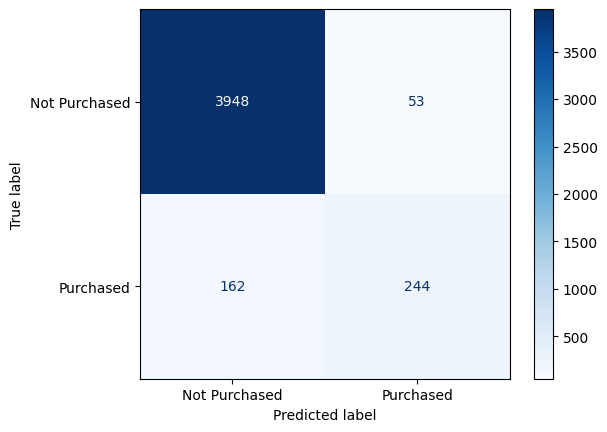

In [16]:
cm = confusion_matrix(y_test_array, predicted_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Purchased', 'Purchased'])
cm_display.plot(cmap='Blues', values_format='d')
plt.show()
#Top Left and Bottom right are true values
#Top right and bottom left are false values

# Creating a K-Nearest Neighbors Model

In [17]:
parameters_knn = {
    'n_neighbors': list(range(1,51)),
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=parameters_knn, scoring='accuracy')
grid_search_knn.fit(X_train_array, y_train_array)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

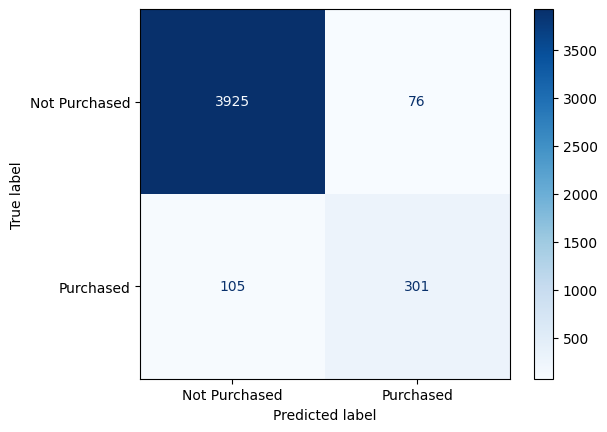

Classification Report:
               precision    recall  f1-score   support

Not Purchased       0.97      0.98      0.98      4001
    Purchased       0.80      0.74      0.77       406

     accuracy                           0.96      4407
    macro avg       0.89      0.86      0.87      4407
 weighted avg       0.96      0.96      0.96      4407



In [18]:
knn_clf =  grid_search_knn.best_estimator_
y_test_pred_knn = knn_clf.predict(X_test_array)
cm = confusion_matrix(y_test_array, y_test_pred_knn)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Purchased', 'Purchased'])
cm_display.plot(cmap='Blues', values_format='d')
plt.show()
report = classification_report(y_test_array, y_test_pred_knn, target_names=['Not Purchased', 'Purchased'])
print("Classification Report:")
print(report)

# Creating a Support Vector Machines Model

In [19]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train_array)
X_test_scaled = scaler.fit_transform(X_test_array)
svm = SVC()
param_grid = {
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf']
}
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, y_train_array)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

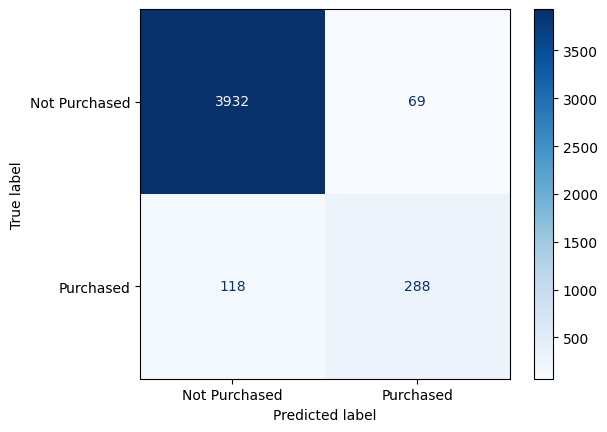

Classification Report:
               precision    recall  f1-score   support

Not Purchased       0.97      0.98      0.98      4001
    Purchased       0.81      0.71      0.75       406

     accuracy                           0.96      4407
    macro avg       0.89      0.85      0.87      4407
 weighted avg       0.96      0.96      0.96      4407



In [20]:
best_svm =  grid_search_svm.best_estimator_
y_test_pred_svm = best_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test_array, y_test_pred_svm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Purchased', 'Purchased'])
cm_display.plot(cmap='Blues', values_format='d')
plt.show()
report = classification_report(y_test_array, y_test_pred_svm, target_names=['Not Purchased', 'Purchased'])
print("Classification Report:")
print(report)

# Creating a Decision Trees Model

In [21]:
param_tree = {
    'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]
}
dt = DecisionTreeClassifier(random_state=365)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_tree, scoring='accuracy')
grid_search_dt.fit(X_train_array, y_train_array)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=365),
             param_grid={'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]},
             scoring='accuracy')

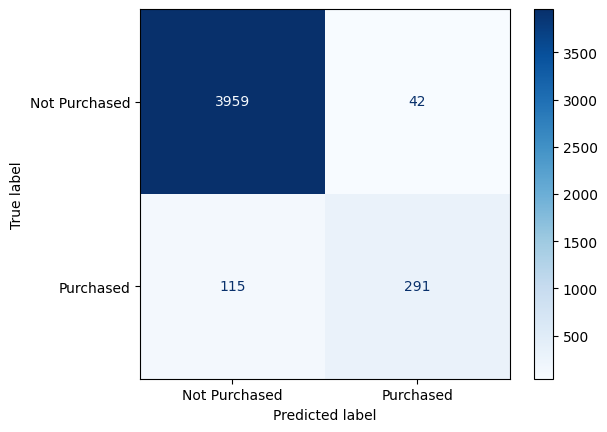

Classification Report:
               precision    recall  f1-score   support

Not Purchased       0.97      0.99      0.98      4001
    Purchased       0.87      0.72      0.79       406

     accuracy                           0.96      4407
    macro avg       0.92      0.85      0.88      4407
 weighted avg       0.96      0.96      0.96      4407



In [22]:
best_dt =  grid_search_dt.best_estimator_
y_test_pred_dt = best_dt.predict(X_test_array)
cm = confusion_matrix(y_test_array, y_test_pred_dt)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Purchased', 'Purchased'])
cm_display.plot(cmap='Blues', values_format='d')
plt.show()
report = classification_report(y_test_array, y_test_pred_dt, target_names=['Not Purchased', 'Purchased'])
print("Classification Report:")
print(report)

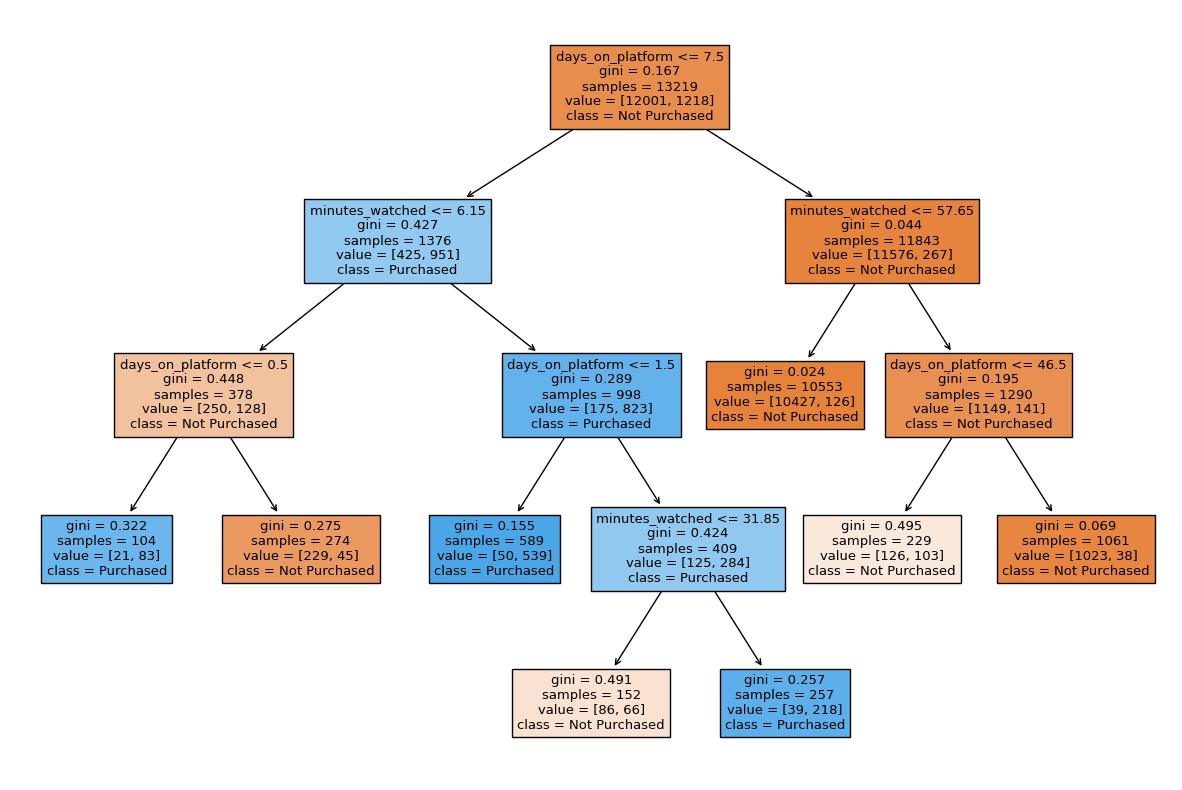

In [23]:
plt.figure(figsize=(15, 10))
plot_tree(best_dt,
          filled=True,  # Colors the nodes
          feature_names=X_train.columns,  # Feature names for splits
          class_names=['Not Purchased', 'Purchased'])  # Class labels
plt.show()

# Creating a Random Forests Model

In [24]:
best_ccp_alpha = 0.01
rf = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha, random_state=365)
rf.fit(X_train_array, y_train)
y_pred = rf.predict(X_test_array)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[3844  157]
 [  82  324]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4001
           1       0.67      0.80      0.73       406

    accuracy                           0.95      4407
   macro avg       0.83      0.88      0.85      4407
weighted avg       0.95      0.95      0.95      4407

